In [1]:
import pandas as pd

# Load the parsed resumes CSV file
file_path = "/content/parsed_resumes.csv"
df = pd.read_csv(file_path)

df.head()


,name,email,phone,links,role,skills,education,experience_years,summary
0,Zane Clark,ymyeliyi@email.com,+1 0729651222\n,https://linkedin.com/in/jskknimopu; https://gi...,Data Journalist,tableau; power bi; r; scikit-learn; excel; mac...,Bachelor of Science in Data Management,14,A dedicated and results-driven Data Journalist...
1,Penelope Young,frgfpacq@email.com,+1 8121057943\n,https://linkedin.com/in/wvohfjcbgm; https://gi...,Fraud Analyst,tableau; power bi; r; numpy; scikit-learn; exc...,Master of Science in Quantitative Finance,14,A dedicated and results-driven Fraud Analyst w...
2,Zach Lee,tuobnixp@email.com,+1 8690904865\n,https://linkedin.com/in/trxzrapnqj; https://gi...,Data Analyst,sql; tableau; power bi; r; machine learning; s...,Bachelor of Science in Economics and Data Science,10,A dedicated and results-driven Healthcare Data...
3,Liam Carter,wvtixbwk@email.com,+1 4517200462\n,https://linkedin.com/in/ytsvtwokny; https://gi...,Bi Developer,sql; tableau; power bi; r; pandas; machine lea...,Master of Engineering in Data Engineering,4,A dedicated and results-driven BI Developer wi...
4,Henry Hill,iwvoyjov@email.com,+1 4516660758\n,https://linkedin.com/in/tabgyhvjll; https://gi...,Data Scientist,tableau; power bi; r; excel; java; machine lea...,Bachelor of Engineering in AI and ML,6,A dedicated and results-driven Sports Data Sci...


In [2]:
# Check for missing values in the dataset
missing_summary = df.isnull().sum()
print(missing_summary)

name                  0
email                 2
phone                 0
links                 0
role                  0
skills                0
education           165
experience_years      0
summary               0
dtype: int64


It seem there is an error when parse education, but we can see it as a normal case in real life, just place value "Unknown" for all of them

In [3]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


In [4]:
df_cleaned = df.copy()
text_fields = ['name', 'email', 'phone', 'links', 'role', 'education', 'summary']
for field in text_fields:
    df_cleaned[field] = df_cleaned[field].astype(str).str.strip() #trim whitespace

In [5]:
df_cleaned['name'] = df_cleaned['name'].str.title() # Standardize name casing (title case)

In [6]:
df_cleaned['phone'] = df_cleaned['phone'].str.replace('\n', '', regex=True)# Remove newline characters in phone

In [7]:
df_cleaned.head()

,name,email,phone,links,role,skills,education,experience_years,summary
0,Zane Clark,ymyeliyi@email.com,+1 0729651222,https://linkedin.com/in/jskknimopu; https://gi...,Data Journalist,tableau; power bi; r; scikit-learn; excel; mac...,Bachelor of Science in Data Management,14,A dedicated and results-driven Data Journalist...
1,Penelope Young,frgfpacq@email.com,+1 8121057943,https://linkedin.com/in/wvohfjcbgm; https://gi...,Fraud Analyst,tableau; power bi; r; numpy; scikit-learn; exc...,Master of Science in Quantitative Finance,14,A dedicated and results-driven Fraud Analyst w...
2,Zach Lee,tuobnixp@email.com,+1 8690904865,https://linkedin.com/in/trxzrapnqj; https://gi...,Data Analyst,sql; tableau; power bi; r; machine learning; s...,Bachelor of Science in Economics and Data Science,10,A dedicated and results-driven Healthcare Data...
3,Liam Carter,wvtixbwk@email.com,+1 4517200462,https://linkedin.com/in/ytsvtwokny; https://gi...,Bi Developer,sql; tableau; power bi; r; pandas; machine lea...,Master of Engineering in Data Engineering,4,A dedicated and results-driven BI Developer wi...
4,Henry Hill,iwvoyjov@email.com,+1 4516660758,https://linkedin.com/in/tabgyhvjll; https://gi...,Data Scientist,tableau; power bi; r; excel; java; machine lea...,Bachelor of Engineering in AI and ML,6,A dedicated and results-driven Sports Data Sci...


In [8]:
# Convert the 'experience_years' column from string to float
df_cleaned['experience_years'] = pd.to_numeric(df_cleaned['experience_years'], errors='coerce').astype(float)

In [9]:
df_cleaned.dtypes['experience_years']

dtype('float64')

In [10]:
# Fill missing values in 'email' and 'education' with "Unknown"
df_cleaned['email'] = df_cleaned['email'].fillna("Unknown")
df_cleaned['education'] = df_cleaned['education'].fillna("Unknown")

In [11]:
df_cleaned[['email', 'education']].isnull().sum()

,0
email,0
education,0


In [12]:
# Export the cleaned DataFrame to a new CSV file
output_path = "/content/cleaned_parsed_resumes.csv"
df_cleaned.to_csv(output_path, index=False)
output_path


'/content/cleaned_parsed_resumes.csv'

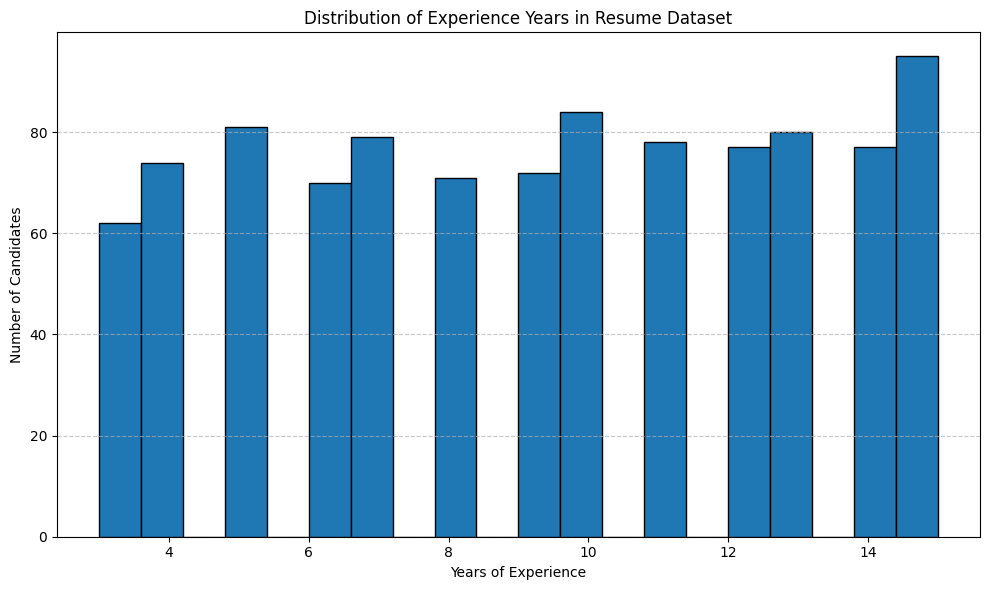

In [14]:
import matplotlib.pyplot as plt

# Plot a histogram of experience years
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['experience_years'], bins=20, edgecolor='black')
plt.title('Distribution of Experience Years in Resume Dataset')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Candidates')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


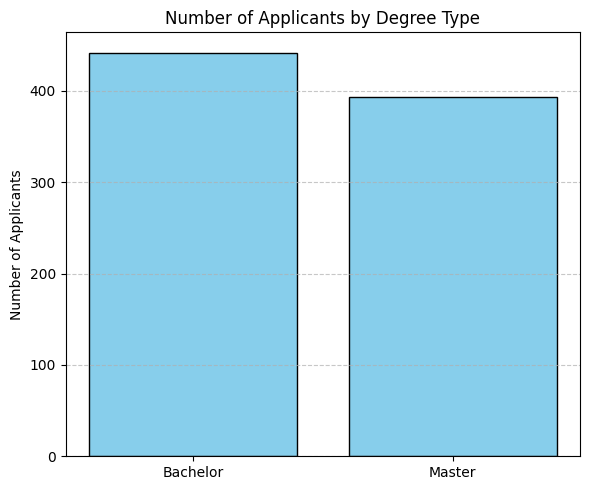

In [15]:
# Create a lowercase copy of the education column to standardize text matching
education_lower = df_cleaned['education'].str.lower()

# Count number of Bachelor's and Master's degrees
degree_counts = {
    'Bachelor': education_lower.str.contains('bachelor').sum(),
    'Master': education_lower.str.contains('master').sum()
}

# Create a bar plot
plt.figure(figsize=(6, 5))
plt.bar(degree_counts.keys(), degree_counts.values(), color='skyblue', edgecolor='black')
plt.title('Number of Applicants by Degree Type')
plt.ylabel('Number of Applicants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


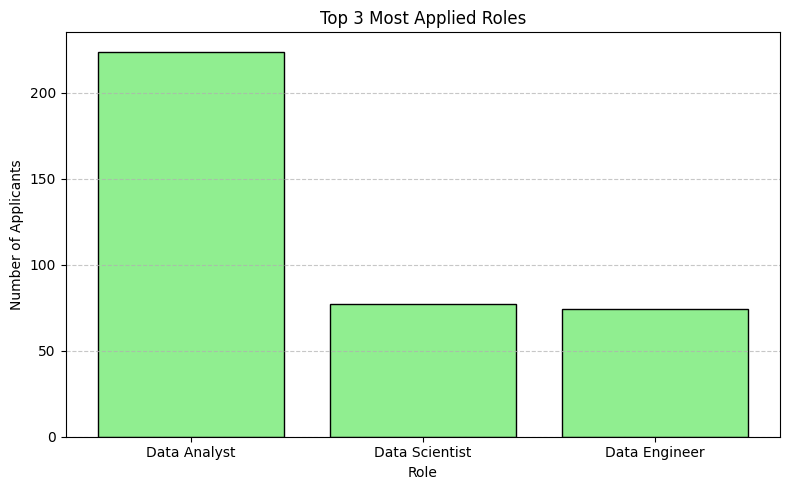

In [16]:
# Count occurrences of each role
top_roles = df_cleaned['role'].value_counts().nlargest(3)

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_roles.index, top_roles.values, color='lightgreen', edgecolor='black')
plt.title('Top 3 Most Applied Roles')
plt.ylabel('Number of Applicants')
plt.xlabel('Role')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
